## PERCEPTRON SOLUCIONANDO OS OPERADORES AND E OR

Perceptron é um neurônio artificial.

Redes podem ser usadas para reconhecimento facial, linguagem natural (reconhecer textos)...

Problemas que não existem algoritmos pré-determinados para resolver.

Aplicações:
- Descoberta de novos remédios;
- Entendimento de linguagem natural;
- Carros autônomos;
- Reconhecimento facial;
- Cura de doenças;
- Bolsa de valores;
- Soluções para controle de tráfego;


Redes são usadas para muitos dados e problemas complexos. Não vale a pena usar redes em problemas simples.

Redes imitam o sistema neural humano no processo de aprendizagem. 

Parecido com a troca de informações em uma rede biológica.

Neurônio: unidade responsável pelo processamento das informações.

Axônio: transmite o sinal de um neurônio para outro. 

Sinapse é a informação trafegando entre os neurônios.

Substâncias químicas são lançadas das sinapses e entram pelos dendritos, aumentando ou diminuindo o potencial elétrico do corpo da célula.
O neurônio dispara se a entrada é maior que um número definido (liga ou não liga).

### Um valor de entrada é fornecido, a rede o processa e uma resposta é retornada.

O neurônio é ativado somente se o valor for maior que um limiar.

Podem haver um número infinito de entradas. Cada entrada terá seu peso.

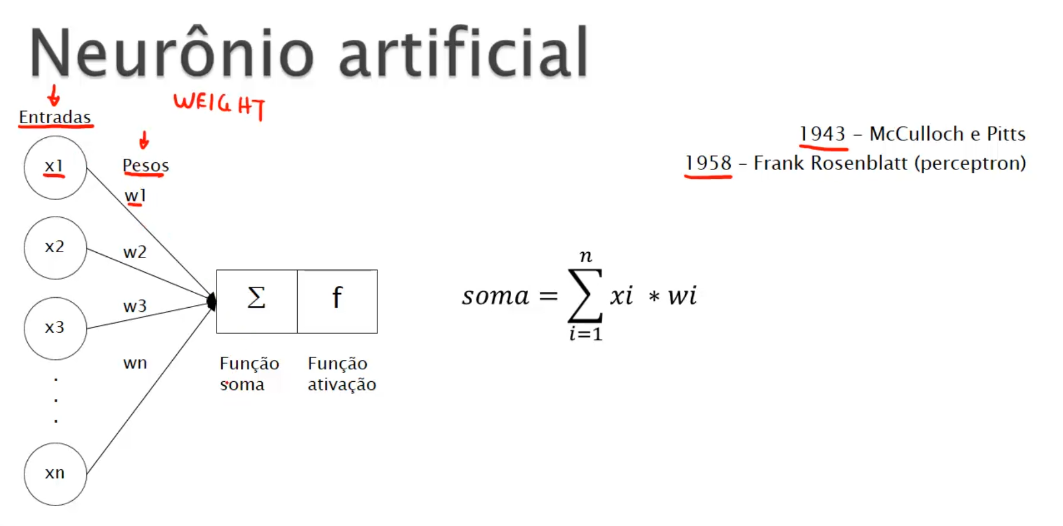

As sinapses são os pesos.
A função de ativação vai dizer se o neurônio será ou não ativado.

Existem várias funções de ativação. Foi escolhida a Step Function (função degrau) - Tudo ou nada.
- Se maior que = 1 (ativação)
- Caso contrário = 0 

O degrau pode ser definido em outro valor que não o 0.

Peso positivo - sinapse amplificadora.

Peso negativo - sinapse inibidora.

Pesos amplificam ou reduzem o sinal de entrada.

Conhecimento da rede neural são os pesos. O treinamento busca otimizar ao máximo os pesos para que a rede consiga se adaptar ao problema em questão.

In [1]:
import numpy as np

In [2]:
entradas = np.array([-1, 7, 5])
pesos = np.array([0.8, 0.1, 0])

def soma(e, p):
    return e.dot(p) # recurso do numpy para otimizar o somatório

s = soma(entradas, pesos)

def stepFunction(soma):
    if (soma >= 1): # DEGRAU DEFINIDO EM 1
        return 1
    return 0

r = stepFunction(s)
print(r)

0


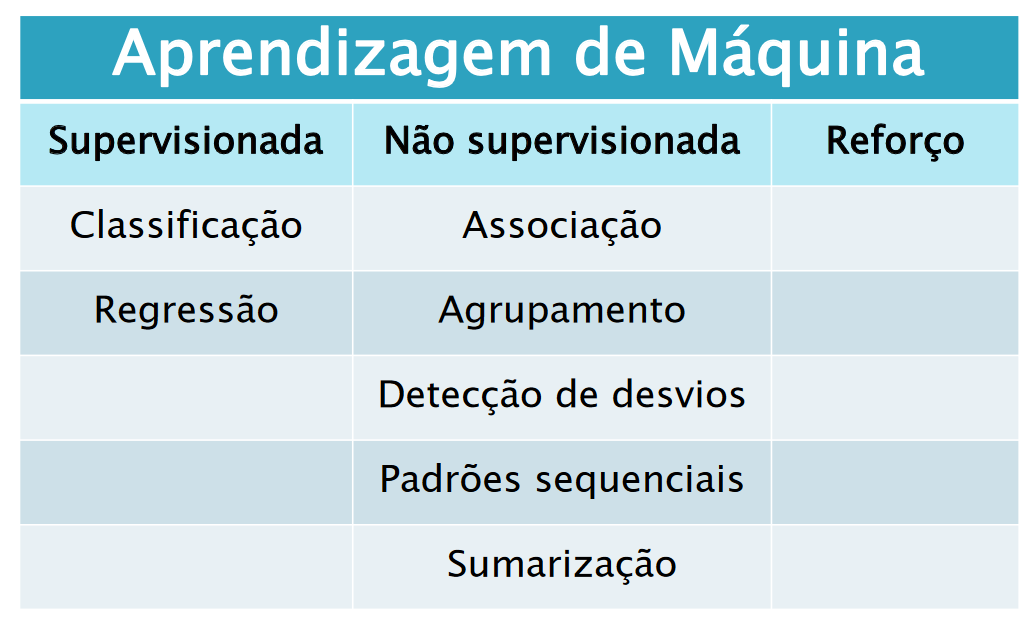

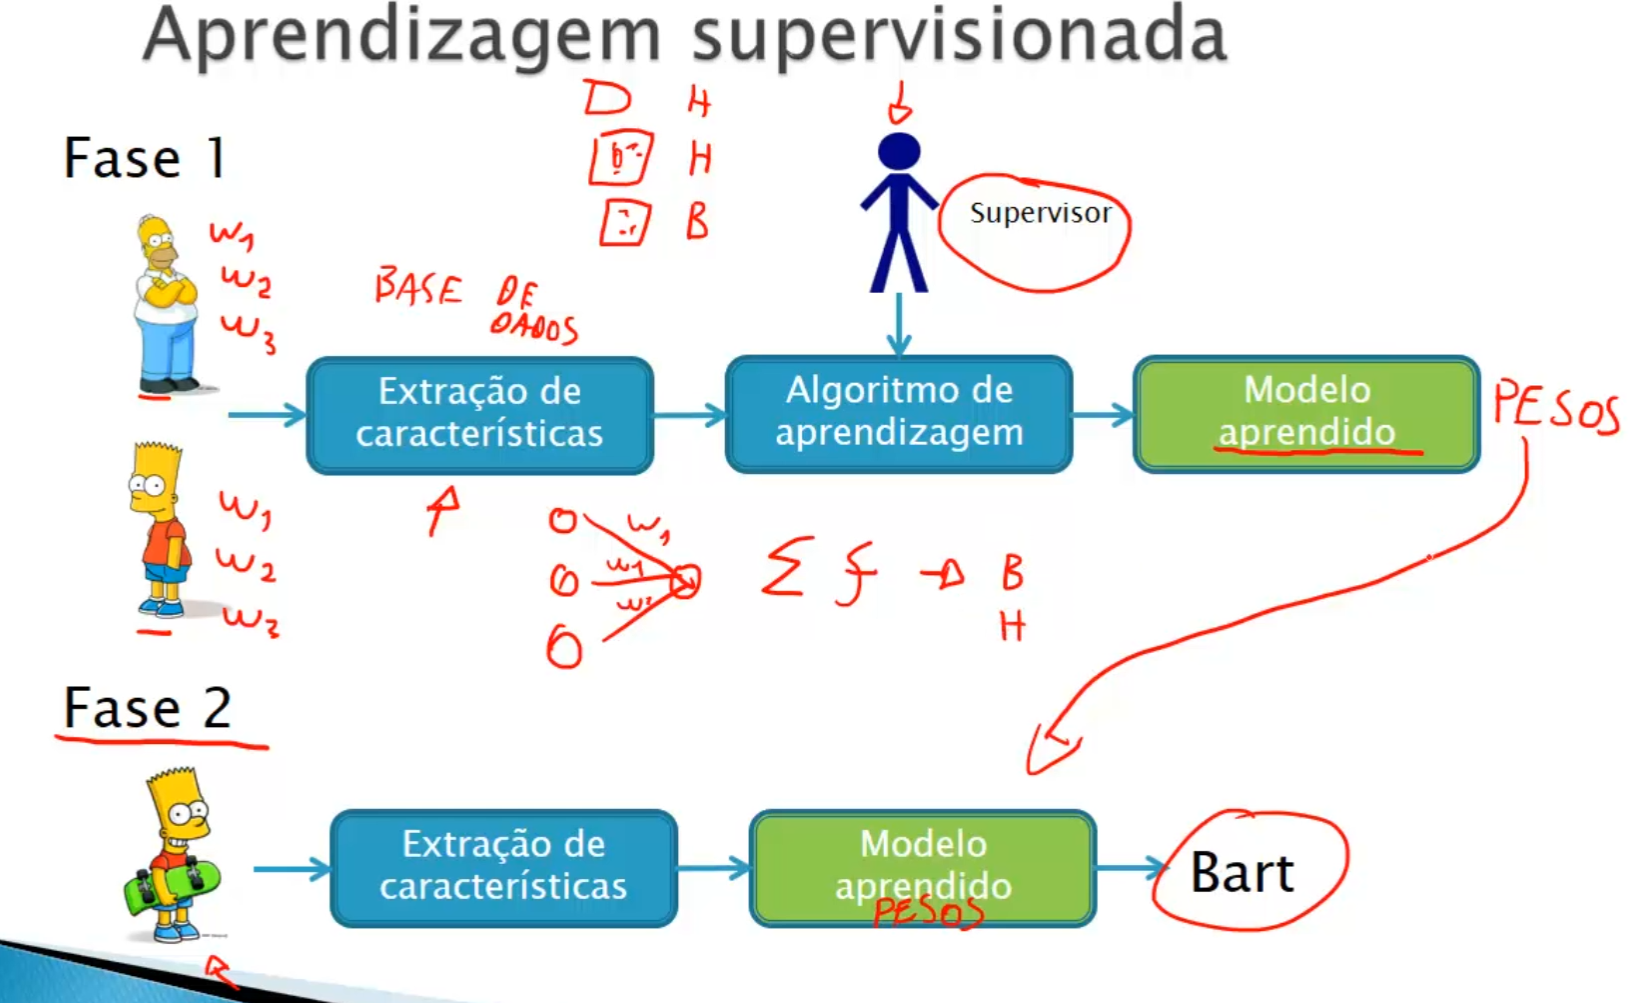

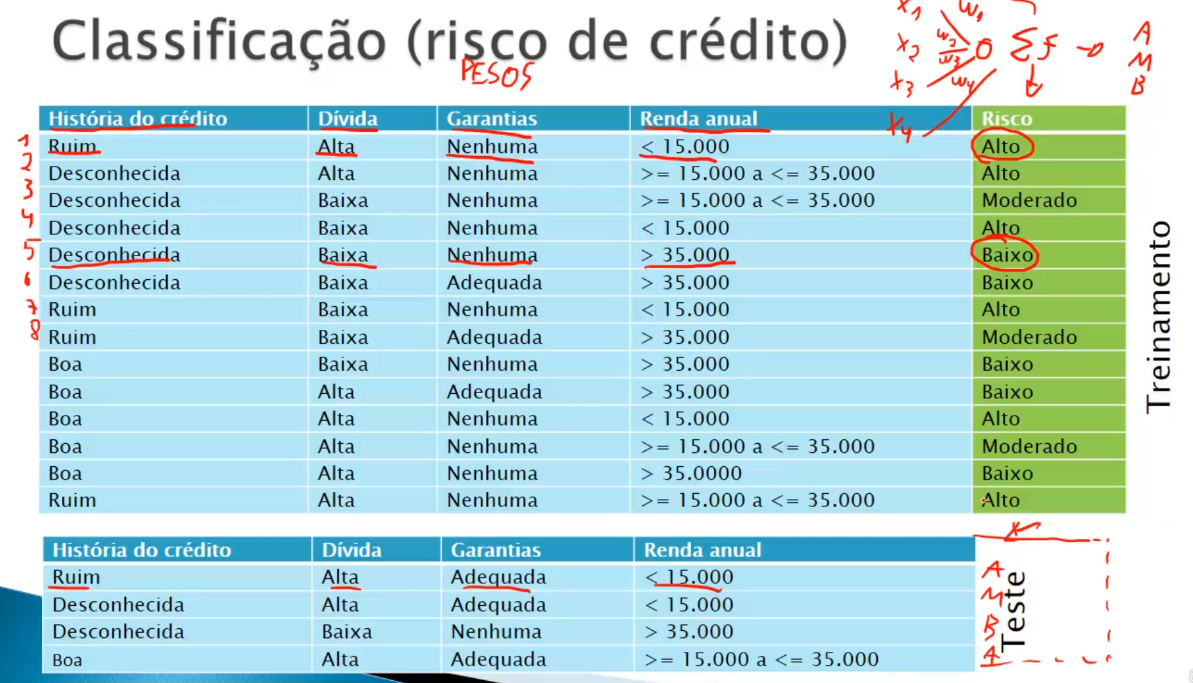

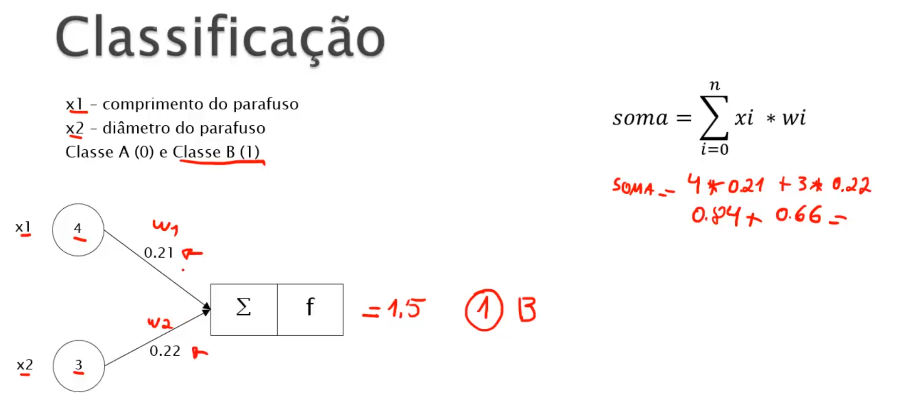

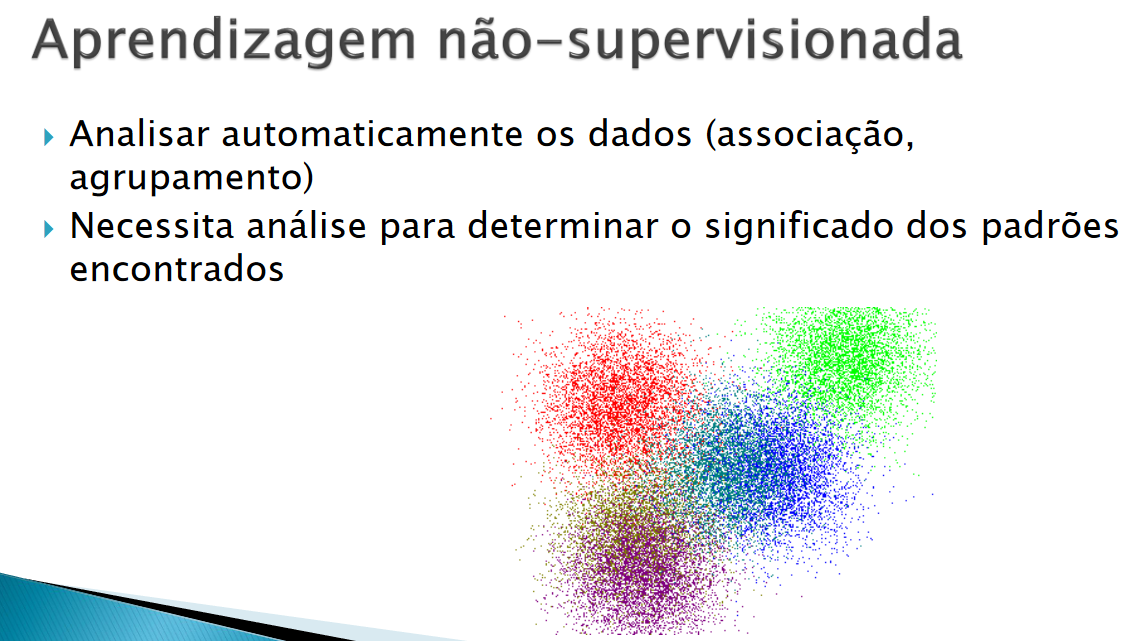

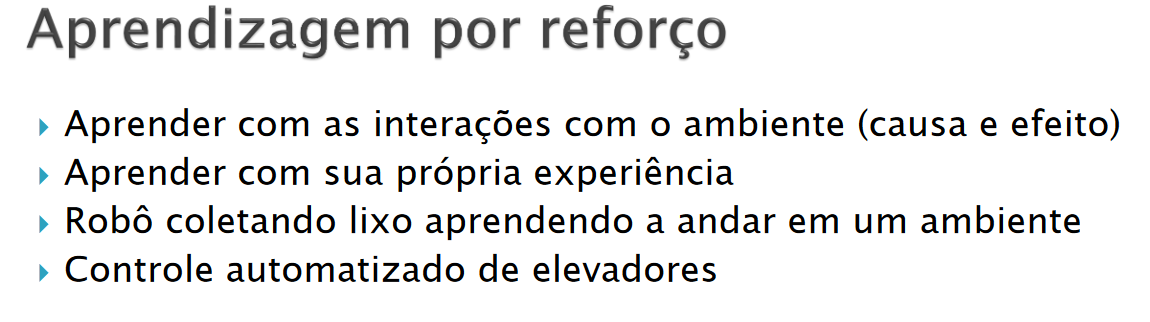

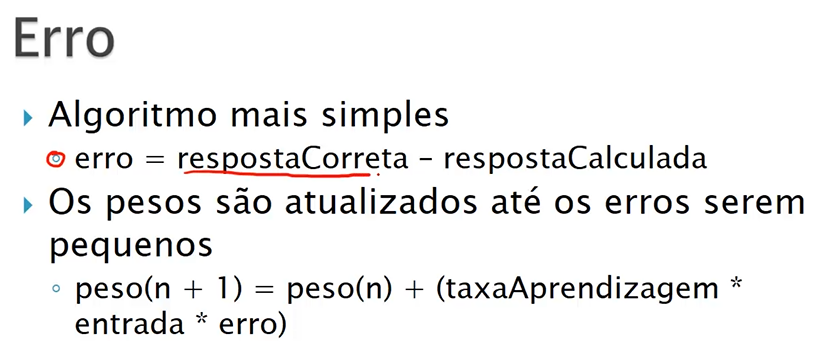

Na imagem abaixo, o erro é calculado para cada combinação de entrada e então os pesos já são atualizados.

IMPORTANTE: nesse caso, só vai ser verificado se o ajuste feito no peso é suficiente na próxima verificação de erro para aquela combinação de entrada, ou seja, quando toda a base estiver sendo verificada de novo.

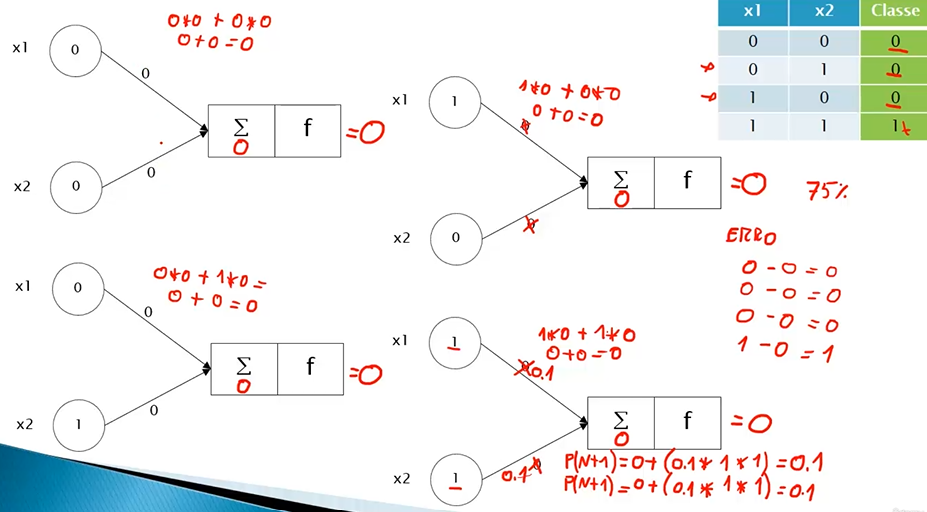

O ajuste feito nos pesos deve ser aplicado para todas as combinações de entradas.

Step Function só retorna 1 para valores >=1.

Enquanto o erro for diferente de zero:

        Para cada registro:

            Calcula a saída com os pesos atuais

            Compara a saída esperada com a saída calculada, somando o erro

            Para cada peso da rede
        
                Atualiza o peso        

In [3]:
entradas = np.array([[0,0], [0,1], [1,0],[1,1]])
saidas = np.array([0,0,0,1])
pesos = np.array([0.0, 0.0])
taxaAprendizagem = 0.1

def calculaSaida(registro):
    s = registro.dot(pesos)
    return stepFunction(s)

def treinar():
    erroTotal = 1
    while (erroTotal != 0):
        erroTotal = 0
        for i in range(len(saidas)):
            saidaCalculada = calculaSaida(np.asarray(entradas[i])) # Converte cada registro para array
            erro = abs(saidas[i] - saidaCalculada)
            erroTotal += erro
            for j in range(len(pesos)):
                pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
                print('Peso atualizado: ' + str(pesos[j]))
        print('Total de erro: ' + str(erroTotal))

In [4]:
treinar()
print('Rede neural treinada')
print(calculaSaida(entradas[0]))
print(calculaSaida(entradas[1]))
print(calculaSaida(entradas[2]))
print(calculaSaida(entradas[3]))

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Total de erro: 1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erro: 1
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Total de erro: 1
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erro: 1
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso a

### Treinando a rede para o operador OR


In [5]:
entradas = np.array([[0,0], [0,1], [1,0],[1,1]])
saidas = np.array([0,1,1,1])
pesos = np.array([0.0, 0.0])
taxaAprendizagem = 0.1

def treinar():
    erroTotal = 1
    while (erroTotal != 0):
        erroTotal = 0
        for i in range(len(saidas)):
            saidaCalculada = calculaSaida(np.asarray(entradas[i])) # Converte cada registro para array
            erro = abs(saidas[i] - saidaCalculada)
            erroTotal += erro
            for j in range(len(pesos)):
                pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
                print('Peso atualizado: ' + str(pesos[j]))
        print('Total de erro: ' + str(erroTotal))

In [6]:
treinar()
print('Rede neural treinada')
print(calculaSaida(entradas[0]))
print(calculaSaida(entradas[1]))
print(calculaSaida(entradas[2]))
print(calculaSaida(entradas[3]))

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erro: 3
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erro: 3
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Total de erro: 2
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Total de erro: 2
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Total de erro: 2
Peso atualizado: 0.7
Peso a

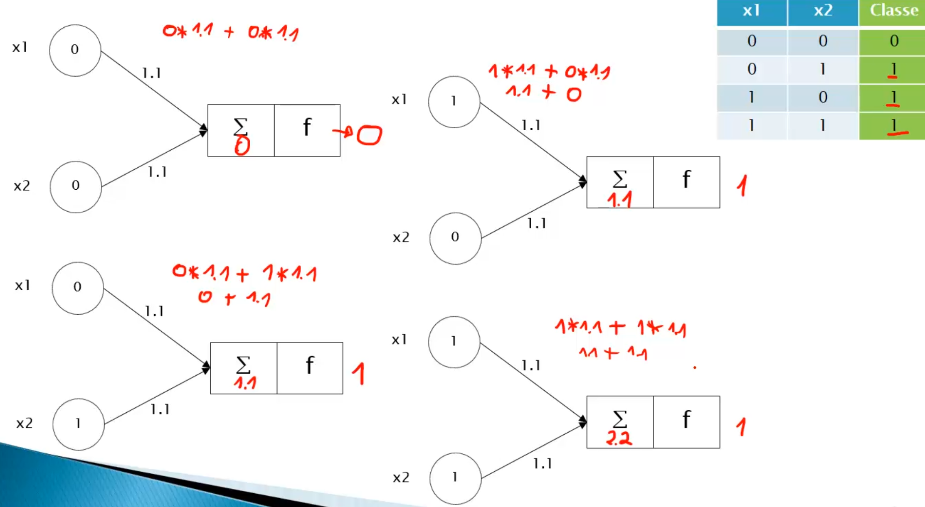

### Treinando a rede para o operador XOR

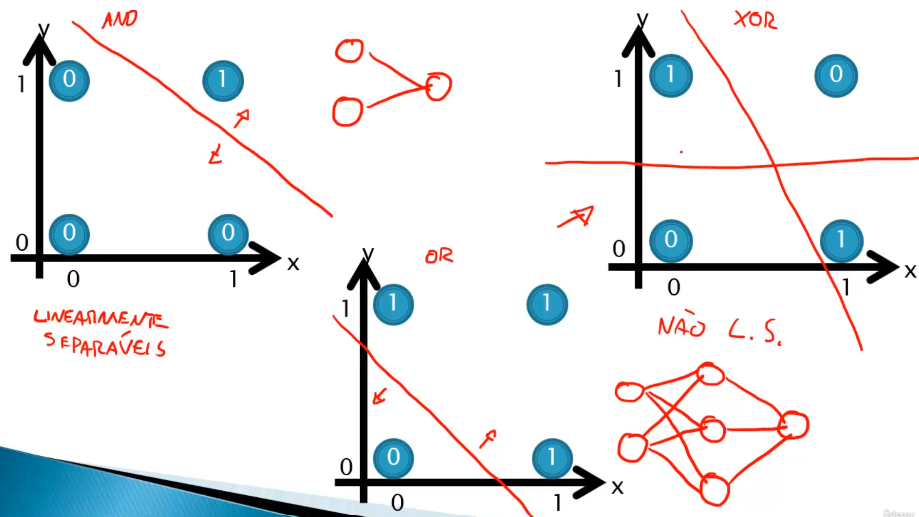

XOR não é linearmente separável, então são necessárias camadas ocultas para que a rede funcione.